In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
import matplotlib.pyplot as plt



In [2]:
def adv_FTCS(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0):
    
    delta_x=(x_max-x_min)/(x_points-1)
    delta_t=(t_max-t_min)/(t_points-1)
    h=c*delta_t/(2*delta_x)
    sol=np.zeros((t_points,x_points))
    #Boundary
    sol[0,:]=u_0(np.linspace(x_min,x_max,x_points))
    u_x=lambda t,x: u_0(x-c*t)
    u_x=np.vectorize(u_x)

    sol[0,:]=u_x(0,np.linspace(x_min,x_max,x_points))
    
    sol[:,0]=u_x(np.linspace(t_min,t_max,t_points),0)
    sol[:,x_points-1]=u_x(np.linspace(t_min,t_max,t_points),1)

    for i in range(1,t_points):    
        
        sol[i,1:x_points-1]=sol[i-1,1:x_points-1]-h*(sol[i-1,2:x_points]-sol[i-1,0:x_points-2])
        
    return sol


In [3]:
def adv_BTCS(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0):
    u_x=lambda t,x: u_0(x-c*t)
    u_x=np.vectorize(u_x)

    delta_x=(x_max-x_min)/(x_points)
    delta_t=(t_max-t_min)/(t_points)

    sol=np.zeros((t_points,x_points))
    #boundary
    sol[0,:]=u_0(np.linspace(x_min,x_max,x_points))

    h=c*delta_t/(2*delta_x)
    
    sol[0,:]=u_x(0,np.linspace(x_min,x_max,x_points))
    
    sol[:,0]=u_x(np.linspace(t_min,t_max,t_points),0)
    sol[:,x_points-1]=u_x(np.linspace(t_min,t_max,t_points),1)
    
    e=np.ones(x_points-2)

    A=spdiags([-h*e,e,e*h],[-1,0,1],x_points-2,x_points-2).A

    for i in range(1,t_points):
        sol_aux=sol[i-1,1:x_points-1]
        
        sol_aux[0]=sol_aux[0]+h*sol[i-1,0]
        sol_aux[-1]=sol_aux[-1]-h*sol[i-1,x_points-1]
        
        sol[i,1:x_points-1]=np.linalg.solve(A,sol_aux)
    return sol

In [4]:
def adv_leapfrog(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0):
    u_x=lambda t,x: u_0(x-c*t)
    u_x=np.vectorize(u_x)
    delta_x=(x_max-x_min)/(x_points-1)
    delta_t=(t_max-t_min)/(t_points-1)
   
    
    sol=np.zeros((t_points,x_points))
    
    h=c*(delta_t)/(delta_x)
    
    
    sol[0,:]=u_x(0,np.linspace(x_min,x_max,x_points))
    sol[1,:]=u_x(delta_t,np.linspace(x_min,x_max,x_points))
    
    sol[:,0]=u_x(np.linspace(t_min,t_max,t_points),0)
    sol[:,x_points-1]=u_x(np.linspace(t_min,t_max,t_points),1)
    
    
    sol[0,:]=u_x(0,np.linspace(x_min,x_max,x_points))
    
    sol[:,0]=u_x(np.linspace(t_min,t_max,t_points),0)
    sol[:,x_points-1]=u_x(np.linspace(t_min,t_max,t_points),1)
    
    for i in range(2,t_points):        
        sol[i,1:x_points-1]=sol[i-2,1:x_points-1]-h*(sol[i-1,2:x_points]-sol[i-1,0:x_points-2])

    return sol
    

In [5]:
def exact(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0):
    u_x=lambda t,x: u_0(x-c*t)
    u_x=np.vectorize(u_x)
    x_array=np.linspace(x_min,x_max,x_points)
    t_array=np.linspace(t_min,t_max,t_points)

    sol=np.zeros((t_points,x_points))

    for i in range(0,t_points):
        sol[i,:]=u_x(t_array[i],x_array)

    return sol

In [6]:

def norm_array(sol,exact,order):
    ret=np.zeros(sol.shape[0])
    for i in range(0,sol.shape[0] ):
        ret[i]=np.sqrt(np.linalg.norm(sol[i,:]-exact[i,:],ord=order))/sol.shape[1]
    return ret




In [7]:

c=-1
t_max=2
t_min=0

x_min=0
x_max=1


u_0=lambda x:np.exp(-((x-0.2)**2)/0.01)
u_0=np.vectorize(u_0)



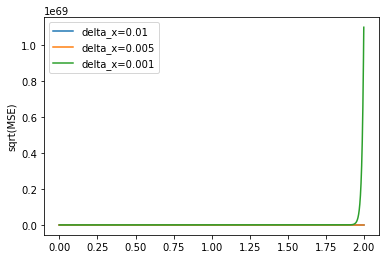

Text(0.5, 0, 'u(x,t)')

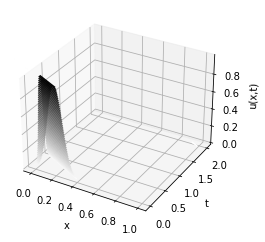

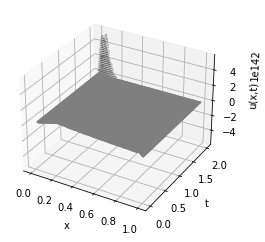

In [8]:
t_points=199
#Note: 2/t_points not 1/t_points!!
x_points=100

sol_1=adv_FTCS(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0)
sol_1_exact=exact(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0)

plt.plot(np.linspace(t_min,t_max,t_points),norm_array(sol_1,sol_1_exact,2))

t_points=399
x_points=200


sol_2=adv_FTCS(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0)
sol_2_exact=exact(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0)

plt.plot(np.linspace(t_min,t_max,t_points),norm_array(sol_2,sol_2_exact,2))


t_points=999
x_points=500

sol_3=adv_FTCS(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0)
sol_3_exact=exact(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0)

plt.plot(np.linspace(t_min,t_max,t_points),norm_array(sol_3,sol_3_exact,2))
plt.legend(["delta_x=0.01","delta_x=0.005","delta_x=0.001"])
plt.ylabel("sqrt(MSE)")

plt.show()


y = np.linspace(t_min,t_max,t_points)
x = np.linspace(x_min,x_max,x_points)

X, Y = np.meshgrid(x, y)
Z = sol_3_exact

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')


y = np.linspace(t_min,t_max,t_points)
x = np.linspace(x_min,x_max,x_points)

X, Y = np.meshgrid(x, y)
Z = sol_3

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')



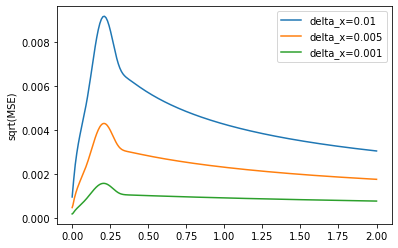

Text(0.5, 0, 'u(x,t)')

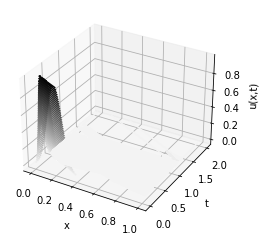

In [9]:
t_points=199
#Note: 2/t_points not 1/t_points!!
x_points=100

sol_1=adv_BTCS(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0)
sol_1_exact=exact(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0)

plt.plot(np.linspace(t_min,t_max,t_points),norm_array(sol_1,sol_1_exact,2))

t_points=399
x_points=200


sol_2=adv_BTCS(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0)
sol_2_exact=exact(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0)

plt.plot(np.linspace(t_min,t_max,t_points),norm_array(sol_2,sol_2_exact,2))


t_points=999
x_points=500

sol_3=adv_BTCS(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0)
sol_3_exact=exact(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0)

plt.plot(np.linspace(t_min,t_max,t_points),norm_array(sol_3,sol_3_exact,2))
plt.legend(["delta_x=0.01","delta_x=0.005","delta_x=0.001"])
plt.ylabel("sqrt(MSE)")
plt.show()


y = np.linspace(t_min,t_max,t_points)
x = np.linspace(x_min,x_max,x_points)

X, Y = np.meshgrid(x, y)
Z = sol_3

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')

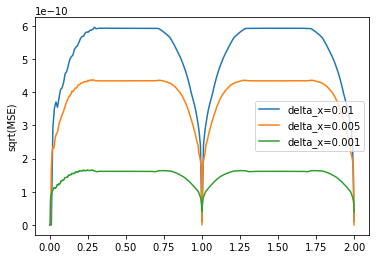

Text(0.5, 0, 'u(x,t)')

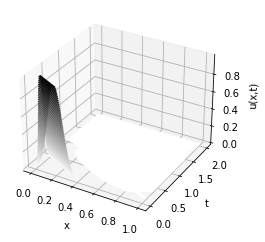

In [10]:
t_points=199
#Note: 2/t_points not 1/t_points!!
x_points=100

sol_1=adv_leapfrog(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0)
sol_1_exact=exact(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0)

plt.plot(np.linspace(t_min,t_max,t_points),norm_array(sol_1,sol_1_exact,2))

t_points=399
x_points=200


sol_2=adv_leapfrog(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0)
sol_2_exact=exact(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0)

plt.plot(np.linspace(t_min,t_max,t_points),norm_array(sol_2,sol_2_exact,2))


t_points=999
x_points=500

sol_3=adv_leapfrog(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0)
sol_3_exact=exact(c,t_min,t_max,x_min,x_max,t_points,x_points,u_0)

plt.plot(np.linspace(t_min,t_max,t_points),norm_array(sol_3,sol_3_exact,2))
plt.legend(["delta_x=0.01","delta_x=0.005","delta_x=0.001"])
plt.ylabel("sqrt(MSE)")
plt.show()


y = np.linspace(t_min,t_max,t_points)
x = np.linspace(x_min,x_max,x_points)

X, Y = np.meshgrid(x, y)
Z = sol_3

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')